In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Any results you write to the current directory are saved as output.

In [2]:
train=pd.read_csv("../input/nlp-getting-started/train.csv")
test=pd.read_csv("../input/nlp-getting-started/test.csv")


In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [7]:
train_text=[]
train_labels=[]
for i in range(len(train[['text']])):
               train_text.append(str(train.iloc[i,3]))
               train_labels.append(train.iloc[i,4])
test_text=[]

for i in range(len(test[['text']])):
               test_text.append(str(test.iloc[i,3]))
               


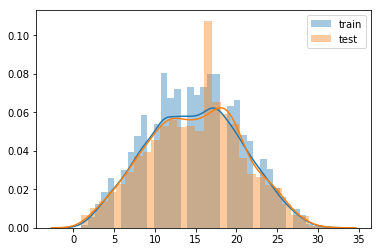

In [8]:
# Text Length(No of Words)
length_train=[]
for i in range(len(train[['text']])):
    length_train.append(len(train_text[i].split()))
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(length_train)
length_test=[]
for i in range(len(test[['text']])):
    length_test.append(len(test_text[i].split()))

sns.distplot(length_test)
plt.legend(['train','test'])

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Lets Tokenize the Strings using Tokenizer function and Pad using pad_sequences
tokenizer=Tokenizer(num_words=1000,oov_token="<oov_tok>")
tokenizer.fit_on_texts(train_text)
word_index=tokenizer.word_index
train_sequences=tokenizer.texts_to_sequences(train_text)
train_padded=pad_sequences(train_sequences,maxlen=15,truncating="post")
test_sequences=tokenizer.texts_to_sequences(test_text)
test_padded=pad_sequences(test_sequences,maxlen=15,truncating="post")

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test_,y_train,y_test_=train_test_split(train_padded,train_labels,test_size=0.01,random_state=121)
X_test,X_validation,y_test,y_validation=train_test_split(X_test_,y_test_,test_size=0.3,random_state=121)
print("X_train_shape :"+str(X_train.shape))
print('y_train_shape:' +str(len(y_train)))
print("X_test_shape :"+str(X_test.shape))
print('y_test_shape: ' +str(len(y_test)) )
print("X_validation_shape :"+str(X_validation.shape))
print('y_validation_shape: ' +str(len(y_validation)) )

X_train_shape :(7536, 15)
y_train_shape:7536
X_test_shape :(53, 15)
y_test_shape: 53
X_validation_shape :(24, 15)
y_validation_shape: 24


In [11]:
from keras.utils import to_categorical
y_train0 = to_categorical(y_train)
y_test0= to_categorical(y_test)
y_validation0=to_categorical(y_validation)

Using TensorFlow backend.


Train on 7536 samples, validate on 53 samples
Epoch 1/10
7536/7536 - 8s - loss: 0.5146 - accuracy: 0.7398 - val_loss: 0.4902 - val_accuracy: 0.7925
Epoch 2/10
cancelling since validation accuracy has been reached to 84%
7536/7536 - 3s - loss: 0.4261 - accuracy: 0.8112 - val_loss: 0.3521 - val_accuracy: 0.8679


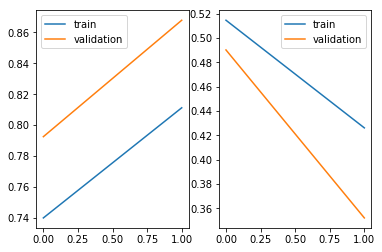

In [12]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.840):
            print('cancelling since validation accuracy has been reached to 84%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import tensorflow as tf
import keras
model=tf.keras.Sequential([ tf.keras.layers.Embedding(1000,128,input_length=(15)),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                 tf.keras.layers.Dense(64),
                                  tf.keras.layers.Dense(32),
                                  tf.keras.layers.Dense(6,activation='relu'),
                                  tf.keras.layers.Dense(2,activation='softmax')
                                ])
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
history=model.fit(X_train,y_train0,epochs=10,validation_data=(X_test,y_test0),verbose=2,callbacks=[callbacks_3])
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])

In [13]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_validation=model.predict(X_validation)
y_pred_train=np.argmax(y_pred_train,axis=1)
y_pred_test=np.argmax(y_pred_test,axis=1)
y_pred_validation=np.argmax(y_pred_validation,axis=1)
print("y_pred_train_shape: "+str(len(y_pred_train)))
print("y_pred_test_shape: "+str(len(y_pred_test)))
print('y_test_shape: '+str(len(y_test)))
print("y_pred_validation_shape: "+str(len(y_pred_validation)))

y_pred_train_shape: 7536
y_pred_test_shape: 53
y_test_shape: 53
y_pred_validation_shape: 24


f1_score on train: 0.7838815223006715
f1_score on test: 0.8292682926829269
f1_score on test: 0.7058823529411764


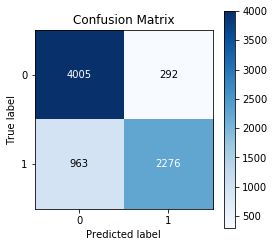

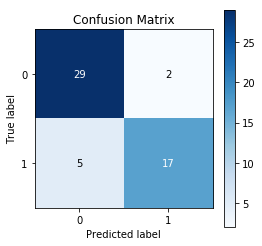

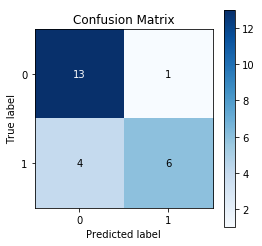

In [14]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_validation,figsize=(4,4))
from sklearn.metrics import f1_score
print("f1_score on train: "+str(f1_score(y_train,y_pred_train)))
print("f1_score on test: "+str(f1_score(y_test,y_pred_test)))
print("f1_score on test: "+str(f1_score(y_validation,y_pred_validation)))

In [15]:
y_test=model.predict(test_padded)
y_test=np.argmax(y_test,axis=1)
print(y_test)

[1 1 1 ... 1 1 0]


In [16]:
sub=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
print(sub.head())

   id  target
0   0       0
1   2       0
2   3       0
3   9       0
4  11       0


In [17]:
y_test=pd.DataFrame(y_test)
result=pd.concat([sub,y_test],axis=1)
result.drop(['target'],axis=1,inplace=True)
result.columns=['id','target']
result.head()
result.to_csv("Sub2.csv",index=False)

X_train_shape :(7536, 25)
y_train_shape:7536
X_test_shape :(53, 25)
y_test_shape: 53
X_validation_shape :(24, 25)
y_validation_shape: 24
Train on 7536 samples, validate on 53 samples
Epoch 1/10
7536/7536 - 9s - loss: 0.5312 - accuracy: 0.7314 - val_loss: 0.4106 - val_accuracy: 0.8302
Epoch 2/10
7536/7536 - 5s - loss: 0.4295 - accuracy: 0.8102 - val_loss: 0.4045 - val_accuracy: 0.7736
Epoch 3/10
cancelling since validation accuracy has been reached to 84%
7536/7536 - 5s - loss: 0.4013 - accuracy: 0.8238 - val_loss: 0.3658 - val_accuracy: 0.8491


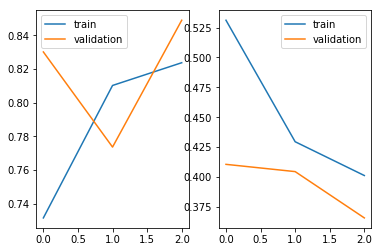

In [18]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Lets Tokenize the Strings using Tokenizer function and Pad using pad_sequences
tokenizer=Tokenizer(num_words=1000,oov_token="<oov_tok>")
tokenizer.fit_on_texts(train_text)
word_index=tokenizer.word_index
train_sequences=tokenizer.texts_to_sequences(train_text)
train_padded=pad_sequences(train_sequences,maxlen=25,truncating="post")
test_sequences=tokenizer.texts_to_sequences(test_text)
test_padded=pad_sequences(test_sequences,maxlen=25,truncating="post")

from sklearn.model_selection import train_test_split
X_train,X_test_,y_train,y_test_=train_test_split(train_padded,train_labels,test_size=0.01,random_state=121)
X_test,X_validation,y_test,y_validation=train_test_split(X_test_,y_test_,test_size=0.3,random_state=121)
print("X_train_shape :"+str(X_train.shape))
print('y_train_shape:' +str(len(y_train)))
print("X_test_shape :"+str(X_test.shape))
print('y_test_shape: ' +str(len(y_test)) )
print("X_validation_shape :"+str(X_validation.shape))
print('y_validation_shape: ' +str(len(y_validation)) )

from keras.utils import to_categorical
y_train0 = to_categorical(y_train)
y_test0= to_categorical(y_test)
y_validation0=to_categorical(y_validation)
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.840):
            print('cancelling since validation accuracy has been reached to 84%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import tensorflow as tf
import keras
model=tf.keras.Sequential([ tf.keras.layers.Embedding(1000,128,input_length=(25)),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                 tf.keras.layers.Dense(64),
                                  tf.keras.layers.Dense(32),
                                  tf.keras.layers.Dense(6,activation='relu'),
                                  tf.keras.layers.Dense(2,activation='softmax')
                                ])
model.compile(loss='categorical_crossentropy',optimizer='RMSProp',metrics=['accuracy'])
history=model.fit(X_train,y_train0,epochs=10,validation_data=(X_test,y_test0),verbose=2,callbacks=[callbacks_3])
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])

y_pred_train_shape: 7536
y_pred_test_shape: 53
y_test_shape: 53
y_pred_validation_shape: 24
f1_score on train: 0.7966015293118097
f1_score on test: 0.8181818181818182
f1_score on test: 0.8000000000000002


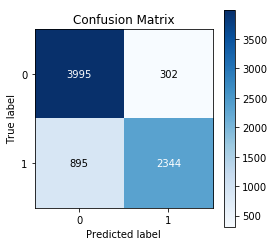

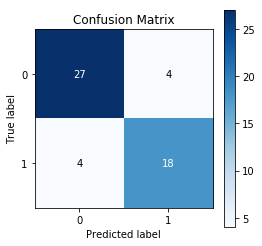

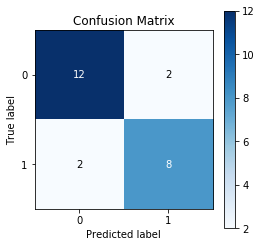

In [19]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_validation=model.predict(X_validation)
y_pred_train=np.argmax(y_pred_train,axis=1)
y_pred_test=np.argmax(y_pred_test,axis=1)
y_pred_validation=np.argmax(y_pred_validation,axis=1)
print("y_pred_train_shape: "+str(len(y_pred_train)))
print("y_pred_test_shape: "+str(len(y_pred_test)))
print('y_test_shape: '+str(len(y_test)))
print("y_pred_validation_shape: "+str(len(y_pred_validation)))

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_validation,figsize=(4,4))
from sklearn.metrics import f1_score
print("f1_score on train: "+str(f1_score(y_train,y_pred_train)))
print("f1_score on test: "+str(f1_score(y_test,y_pred_test)))
print("f1_score on test: "+str(f1_score(y_validation,y_pred_validation)))



In [20]:
y_test=model.predict(test_padded)
y_test=np.argmax(y_test,axis=1)
print(y_test)
sub=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
y_test=pd.DataFrame(y_test)
result=pd.concat([sub,y_test],axis=1)
result.drop(['target'],axis=1,inplace=True)
result.columns=['id','target']
result.head()
result.to_csv("Sub3.csv",index=False)

[1 1 1 ... 1 1 0]
